# Sage Shaw

### ME 571 - Spring 2018

# HW 3 - Problem 1

In [30]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import multiprocessing
from math import log

my_proc_count = multiprocessing.cpu_count()

In [36]:
str(int(log(my_proc_count,2)))

'4'

# My Nodes

My first step for this assignment was to create my own "simplest" formulation of using the Jacobi Method in parallel to solve the PDE. What I saw as the simplest was to use a node centered approach where each process had the same number of unkowns. In effect this meant that we would have $2^P+2$ total nodes including the boundary nodes wich needn't be calculated. 

This was not what you asked for, so after this I modified the code to work for $2^P+1$ nodes and final for the cell centered approach. 

In [2]:
%%bash
mpicc demo_util.c hw3p1_sage.c -o bin/hw3p1_sage -lm
mpirun -n 4 bin/hw3p1_sage -p 5 --itermax 100000 --tol 1.0e-10 > csv/hw1p1_sage_test.csv

iterations: 47362
residual: 9.99967e-11
nodes: 130
error: 0.000395044


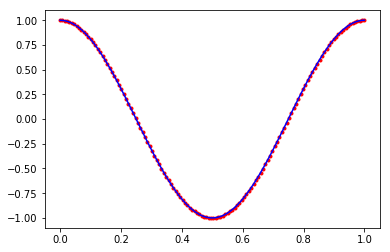

In [3]:
A = np.genfromtxt('csv/hw1p1_sage_test.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Donna's Nodes

In [20]:
%%bash
mpicc demo_util.c hw3p1_node.c -o bin/hw3p1_node -lm
mpirun -n 4 bin/hw3p1_node -p 5 --itermax 100000 --tol 1.0e-10 > csv/hw1p1_node_test.csv

iterations: 51283
residual: 9.99842e-11
nodes: 129
error: 0.000401561


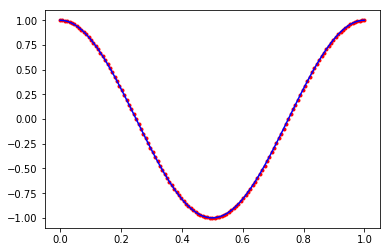

In [5]:
A = np.genfromtxt('csv/hw1p1_node_test.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Cells

In [21]:
%%bash
mpicc demo_util.c hw3p1_cell.c -o bin/hw3p1_cell -lm
mpirun -n 4 bin/hw3p1_cell -p 5 --itermax 1000000 --tol 1.0e-10 > csv/hw1p1_cell_test.csv

iterations: 46677
residual: 9.99971e-11
cells: 128
error: 0.000301185


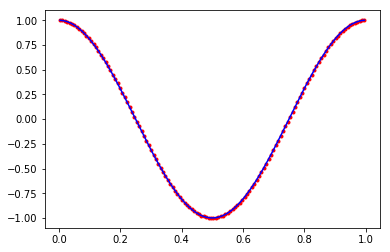

In [7]:
A = np.genfromtxt('csv/hw1p1_cell_test.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

# Parts (a & b) Independence of the number of processes

The following runs show that the programs hw3p1_node and hw3p1_cell generate the same results regardless of the number of processes used. Additionally the number of iterations and error are essentially the same as the results provided. Code listed for these programs appears at the end of this notebook.

In [22]:
# node centered 
my_num = 6
ns = [2**i for i in range(my_num)]
ps = [7-i for i in range(my_num)]
for n,p in zip(ns,ps):
    print((n,p))
    cmd = 'mpirun -n '+ str(n) + ' bin/hw3p1_node -p ' + str(p) + ' --itermax 100000 --tol 1.0e-10'
    f = open('csv/hw3_p1_a_results_node_' + str(n) + 'proc.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

(1, 7)
(2, 6)
(4, 5)
(8, 4)
(16, 3)
(32, 2)


In [23]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [2**i for i in range(my_num)]:    
    A = np.genfromtxt('csv/hw3_p1_a_results_node_' + str(n) +'proc.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0,1,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

    Processes  iterations      residual     error
1         1.0     51283.0  9.998424e-11  0.000402
2         2.0     51283.0  9.998424e-11  0.000402
4         4.0     51283.0  9.998424e-11  0.000402
8         8.0     51283.0  9.998424e-11  0.000402
16       16.0     51283.0  9.998424e-11  0.000402
32       32.0     51283.0  9.998424e-11  0.000402


In [24]:
#cell centered
my_num = 6
ns = [2**i for i in range(my_num)]
ps = [7-i for i in range(my_num)]
for n,p in zip(ns,ps):
    print((n,p))
    cmd = 'mpirun -n '+ str(n) + ' bin/hw3p1_cell -p ' + str(p) + ' --itermax 100000 --tol 1.0e-10'
    f = open('csv/hw3_p1_a_results_cell_' + str(n) + 'proc.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

(1, 7)
(2, 6)
(4, 5)
(8, 4)
(16, 3)
(32, 2)


In [25]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [2**i for i in range(my_num)]:    
    A = np.genfromtxt('csv/hw3_p1_a_results_cell_' + str(n) +'proc.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

    Processes  iterations      residual     error
1         1.0     46677.0  9.999712e-11  0.000301
2         2.0     46677.0  9.999712e-11  0.000301
4         4.0     46677.0  9.999712e-11  0.000301
8         8.0     46677.0  9.999712e-11  0.000301
16       16.0     46677.0  9.999712e-11  0.000301
32       32.0     46677.0  9.999712e-11  0.000301


# Part (c)

From the tables and plots below we can see that we get second order accuracy with respect to the step-width of the mesh.

In [40]:
proc_pow_2 = int(log(my_proc_count,2))
powers = range(5,11)
ps = [p-proc_pow_2 for p in powers]
print(ps)

[1, 2, 3, 4, 5, 6]


In [53]:
# cell centered second order convergence
for p in ps:
    cmd = 'mpirun -n '+str(my_proc_count)+' bin/hw3p1_cell -p ' + str(p) + ' --itermax 10000000 --tol 1.0e-14'
    f = open('csv/hw3_p1_c_results_cell_N_' + str(2**(p+proc_pow_2)) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

           N  iterations      residual     error
32      32.0      5395.0  9.992007e-15  0.004815
64      64.0     20457.0  9.992007e-15  0.001205
128    128.0     77299.0  9.992007e-15  0.000301
256    256.0    291419.0  9.992007e-15  0.000075
512    512.0   1093857.0  9.992007e-15  0.000019
1024  1024.0   4069764.0  9.992007e-15  0.000005


<IPython.core.display.Javascript object>


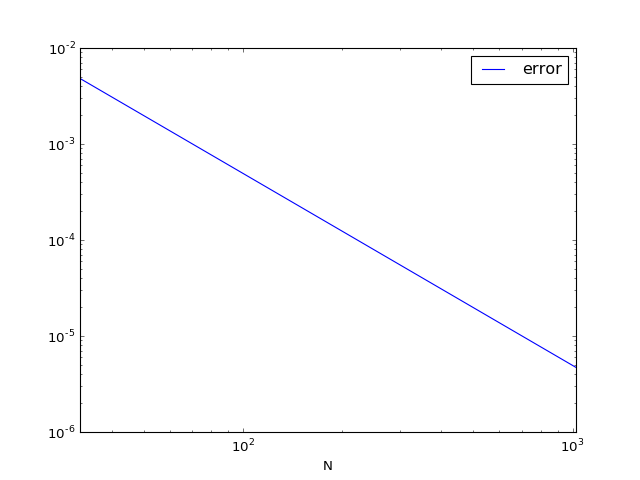

In [54]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for p in ps:    
    A = np.genfromtxt('csv/hw3_p1_c_results_cell_N_' + str(2**(p+proc_pow_2)) +'.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'N': (2**(p+proc_pow_2)), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(2**(p+proc_pow_2))))
print(df)
df.plot(x='N', y='error', loglog=True)

In [46]:
# node centered second order convergence
for p in ps:
    cmd = 'mpirun -n 4 bin/hw3p1_node -p ' + str(p) + ' --itermax 10000000 --tol 1.0e-14'
    f = open('csv/hw3_p1_c_results_node_N_' + str(2**(p+proc_pow_2)) + '.csv','w')
    process = subprocess.call(cmd.split(), stdout=f)
    f.close()

           N  iterations      residual     error
32      32.0       383.0  9.880985e-15  0.106059
64      64.0      1487.0  9.992007e-15  0.025901
128    128.0      5688.0  9.992007e-15  0.006438
256    256.0     21649.0  9.992007e-15  0.001607
512    512.0     81999.0  9.992007e-15  0.000402
1024  1024.0    309834.0  9.992007e-15  0.000100


<IPython.core.display.Javascript object>


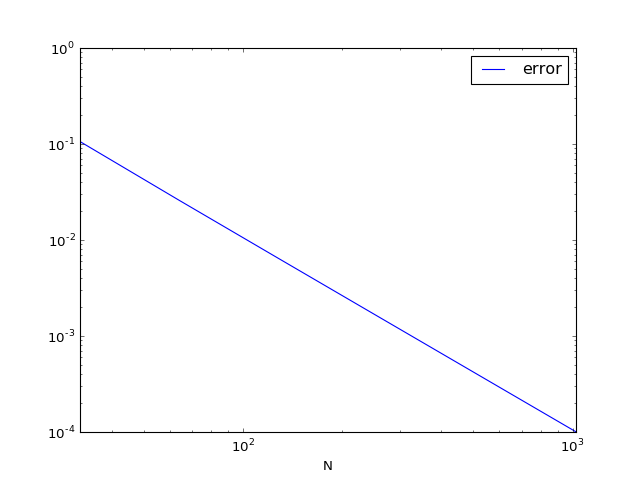

In [52]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for p in ps:    
    A = np.genfromtxt('csv/hw3_p1_c_results_node_N_' + str(2**(p+proc_pow_2)) +'.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    nodes = len(A)
    h = 1/(nodes-1)
    x = np.linspace(0,1,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'N': (2**(p+proc_pow_2)), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(2**(p+proc_pow_2))))
print(df)
df.plot(x='N', y='error', loglog=True)

# Part (d)

In the node centerd approach that you presented in class, there was a node at the boundary between processes. Your solution was to have both adjacent processes calculate updates for this node and each process would have a ghost node on the opposite side of this node, making them two steps appart. 

In this implementation the redundant node calculations will be the same. Assuming they were the same for the previous step and that the ghost nodes were synchronized, we have that
\begin{align*}
u_{M-1}^{k} & = u_{0}^{k+1} & u_{M}^{k} & = u_{1}^{k+1} & u_{M+1}^{k} & = u_{2}^{k+1}
\end{align*}
The cacluations for the residuals (and thus the updates) are identical and hence the updates are identical. 

Since they are identical there is no need to duplicate their calculations over multiple processes. Each update is determined by the adjacent nodes regardless of the number of processes. If two processes were to caculate different results one would contradict our formulation. Realizing this in advance, I avoided this dupliation in my code.

For the problems on this assignment, I've found it easier to abandon the geometric interpretation of the problem once I have my matrix system. Once I have the correct system of equations it's a simple matter of parralellizing an iterative method. For this reason, I believe that solving this problem on a mesh with $2^P$ interior nodes to be the most straightforward implementation since it leads to a $2^P \times 2^P$ system of equations which divides nicely by a power of 2. The code is simpiler since we have the same number of nodes on each process and no special cases for the first and last process. 

Using a node centered solution on a mesh with $2^P$ cells was slightly less elegant since there were $2^p-1$ unknowns. My solution was to have the last process calculate one node fewer than the others. This was a special case, but it had an easy fix.

Using the cell centered solution on this mesh was more complicated in every respect. In fact, I had missunderstood the algebra for quite some time and did not realize that the matrix is different in the cell centered formulation (with 3s in the upper left and lower right corners of the matrix instead of 2s). This required more special cases than either of the other two methods. Once I understood the algebra, I again abandoned the geometric interpretation of the problem in favor of working with the system directly.

I am willing to take on faith that cell centered formulations with $2^P$ steps has advantages in more complicated problems, or more complicated algorithms (perhaps in adaptive mesh refinement), but for these methods applied to this problem it is my least favorite.

In [55]:
%%bash
cat hw3p1_sage.c

# include <math.h>
# include <mpi.h>
# include "demo_util.h"
# include <stdio.h>

/********************************************************************

    f(x) denotes the forcing term
    Au=b is the linear system we're solving
    M = 2^p is the number of unknowns per process
    N = M*procs is the total number of unkowns (or interior nodes)

    Each process will have M+2 nodes stored. M interior nodes and 
        2 end point nodes that it will synchronize at each iteration.

    Residuals and updates will be computed on the fly to conserve memory.

    The convention will be that each process recieves their left endpoint
        from the previous process before passing on their right end point
        to the next process.

********************************************************************/

double foo(double x){
    return -1*(2*M_PI)*(2*M_PI)*cos(2*M_PI*x);
}


int main(int argc, char** argv){  

    int rank, nprocs;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WO

In [56]:
%%bash
cat hw3p1_node.c

# include <math.h>
# include <mpi.h>
# include "demo_util.h"
# include <stdio.h>

/********************************************************************

    Donna's Node Centered Approach

    f(x) denotes the forcing term
    Au=b is the linear system we're solving
    M = 2^p is the number of unknowns per process
    N = M*procs is the total number of unkowns (or interior nodes)

    Each process will have M+2 nodes stored. M interior nodes and 
        2 end point nodes that it will synchronize at each iteration.
        Except the last process. The last process will have M-2 interior
        nodes making the total number of distinct nodes (including the
        boundary) M*nprocs - a power of 2.

    Residuals and updates will be computed on the fly to conserve memory.

    The convention will be that each process recieves their left endpoint
        from the previous process before passing on their right end point
        to the next process.

*************************************

In [57]:
%%bash
cat hw3p1_cell.c

# include <math.h>
# include <mpi.h>
# include "demo_util.h"
# include <stdio.h>

/********************************************************************

    f(x) denotes the forcing term
    Au=b is the linear system we're solving
    M = 2^p is the number of unknowns per process
    N = M*procs is the total number of unkowns (or interior nodes)

    Each process will have M+2 nodes stored. M interior nodes and 
        2 end point nodes that it will synchronize at each iteration.

    Residuals and updates will be computed on the fly to conserve memory.

    The convention will be that each process recieves their left endpoint
        from the previous process before passing on their right end point
        to the next process.

********************************************************************/

double foo(double x){
    return -1*(2*M_PI)*(2*M_PI)*cos(2*M_PI*x);
}


int main(int argc, char** argv){  

    int rank, nprocs;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WO